# 주제 : Hotel booking user 예약 예측

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import HeatMap
import plotly.express as px
from sklearn.metrics import roc_curve, auc, f1_score

In [ ]:
from google.colab import drive

# Google 드라이브 마운트
drive.mount('/content/drive')

Mounted at /content/drive


---
# `1` data 소개

In [ ]:
hotel_bookings_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학교/기계학습/hotel_booking 프로젝트/hotel_bookings.csv')
hotel_bookings_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


- hotel: 호텔 ('Resort Hotel' or 'City Hotel')
- is_canceled: 예약 취소 여부 (0: 취소되지 않음, 1: 취소됨)
- lead_time: 예약 시점과 도착 시점 사이의 일수
- arrival_date_year: 도착 연도
- arrival_date_month: 도착 월
- arrival_date_week_number: 도착 주차
- arrival_date_day_of_month: 도착 일
- stays_in_weekend_nights: 주말 밤 숙박 수
- stays_in_week_nights: 주중 밤 숙박 수
- adults: 성인 수
- children: 어린이 수
- babies: 유아 수
- meal: 식사 유형 (예: 'BB', 'HB', 'FB')
- country: 거주 국가
- market_segment: 시장 세분화 (예: 'Direct', 'Corporate')
- distribution_channel: 유통 채널 (예: 'TA/TO', 'Direct')
- is_repeated_guest: 반복 고객 여부 (0: 처음 방문, 1: 재방문)
- previous_cancellations: 이전 취소 건수
- previous_bookings_not_canceled: 이전에 취소되지 않은 예약 건수
- reserved_room_type: 예약된 객실 유형
- assigned_room_type: 배정된 객실 유형
- booking_changes: 예약 변경 횟수
- deposit_type: 보증금 유형 (예: 'No Deposit', 'Refundable', 'Non Refund')
- agent: 예약 에이전트 ID
- company: 회사 ID
- days_in_waiting_list: 대기 리스트에 있었던 일수
- customer_type: 고객 유형 (예: 'Transient', 'Contract')
- adr: 평균 일일 요금
- required_car_parking_spaces: 필요한 주차 공간 수
- total_of_special_requests: 총 특별 요청 수
- reservation_status: 예약 상태 (예: 'Check-Out', 'Canceled')
- reservation_status_date: 예약 상태 날짜

In [ ]:
hotel_bookings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_bookings_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df = hotel_bookings_data.copy()

# 'country' 열에서 NaN 값을 가진 행 모두 삭제
df = df.dropna(subset=['country'])
# 'agent', 'company' 열에서 NaN 값을 0으로 대체
df[['agent', 'company']] = df[['agent', 'company']].fillna(0)
#'children'열에서 Nan 값을 0으로 대체
df['children'] = df['children'].fillna(0)


df = df.reset_index(drop=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

---
# `2` 고객 특징 분석

In [ ]:
# Filter out warnings for cleaner outputs
import warnings
warnings.filterwarnings('ignore')

## `2-01` 예약자들의 국가 분포


In [ ]:
country_dist = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_dist.columns = ['country', 'No of guests']
country_dist

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_dist, locations = country_dist['country'],
                           color = country_dist['No of guests'], hover_name = country_dist['country'])
guests_map.show()

- PRT(21071) > GBR(9676) > FRA(8481)> ESP(6391)> DEU(6069)
- 다양한 국적의 사람들이 resort 및 city 호텔에 머물지만 특히 포르투갈과 유럽권 사람들이 많이 방문함을 알 수 있음

## `2-02` 선호하는 hotel유형 및 가격

In [ ]:
data = df[df['is_canceled'] == 0]

In [ ]:
px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel')

- 선호하는 호텔 유형은 다양하게 분포되어 있음을 확인함.
- 호텔의 가격 또한 광범위하다. 특히 type A와 G의 경우 가격이 천차만별인 것을 알 수 있음

## `2-03` 호텔 가격 변동

In [ ]:
#resort
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
#city
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [ ]:
# 연도별 평균 일일 요금(ADR: Average Daily Rate)

resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

#merge
hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']

#month 순서대로 정렬
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hotel['month_num'] = hotel['month'].apply(lambda x: month_order.index(x) + 1)

hotel_price = hotel.sort_values('month_num').drop('month_num', axis=1).reset_index(drop=True)
hotel_price

,month,price_for_resort,price_for_city_hotel
0,January,48.940000,82.160634
1,February,54.468180,86.183025
2,March,57.362727,90.170722
3,April,76.176140,111.856824
4,May,76.734804,120.445842
5,June,108.079808,117.702075
6,July,150.483553,115.563810
7,August,181.348715,118.412083
8,September,96.288897,112.598452
9,October,61.883818,101.745956


In [ ]:
plt.figure(figsize = (17, 8))

px.line(hotel_price, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months')

<Figure size 1700x800 with 0 Axes>

- resort hotel은 변동이 크고 여름에 특히 가격이 높음.
- city hotel은 여름을 제외한 모든 계절에 상대적으로 resort보다 높은 일정한 가격을 유지함.
- 고객들이 resort hotel은 여름 휴가철 성수기에 많이 찾아 특히 가격이 높아진 것이라고 생각.
- city hotel은 resort hotel보다는 고급진 호텔이라 더 비싼 것이라고 생각.

## `2-04` 방문 고객 수

In [ ]:
data_resort['people'] = data_resort['adults'] + data_resort['children'] + data_resort['babies']
people_resort = data_resort.copy()

data_city['people'] = data_city['adults'] + data_city['children'] + data_city['babies']
people_city = data_city.copy()

In [ ]:
#resort
resort_guests = people_resort.groupby('arrival_date_month')['people'].sum().reset_index()
resort_guests.columns = ['month', 'no of guests']

#city
city_guests = people_city.groupby('arrival_date_month')['people'].sum().reset_index()
city_guests.columns=['month','no of guests']

#merge
guests = resort_guests.merge(city_guests,on='month')
guests.columns=['month','no of guests in resort','no of guest in city hotel']

#month 순서대로 정렬
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
guests['month_num'] = guests['month'].apply(lambda x: month_order.index(x) + 1)

guests_no = guests.sort_values('month_num').drop('month_num', axis=1).reset_index(drop=True)
guests_no

,month,no of guests in resort,no of guest in city hotel
0,January,3116.0,4002.0
1,February,4231.0,5723.0
2,March,4544.0,7634.0
3,April,4649.0,8146.0
4,May,4849.0,8579.0
5,June,4110.0,8396.0
6,July,7006.0,10266.0
7,August,7474.0,11620.0
8,September,4129.0,7895.0
9,October,4727.0,7927.0


In [ ]:
px.line(guests_no, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months', template = 'plotly_dark')

- 전반적으로 city보다는 resort hotel 방문자가 압도적으로 많은 것을 확인할 수 있음.
- 두 hotel 모두 여름철에 방문객이 증가하고 겨울철에 방문객이 감소함.

## `2-05` 머무는 시간

In [ ]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,308
1,0,Resort Hotel,367
2,1,City Hotel,9169
3,1,Resort Hotel,6369
4,2,City Hotel,10992
...,...,...,...
61,46,Resort Hotel,1
62,48,City Hotel,1
63,49,City Hotel,1
64,56,Resort Hotel,1


In [ ]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

- city hotel은 2~4일 머무는 고객이 제일 많음
- resort hotel도 2~4일 머무는 고객이 제일 많지만 7일 머무는 고객이 특히 많은 것을 알 수 있음.

---
# `3` Pre Processing

## `3-01` 변수선택

제거변수
- arrival_date_year: 도착 연도
- arrival_date_month: 도착 월
- arrival_date_week_number: 도착 주차
- arrival_date_day_of_month: 도착 일

-> 도착과 관련한 정보는 cancel과 상관이 없음. 고객이 도착을 했다는 것은 cancel하지 않고 호텔에 방문했다는 의미.


- agent: 예약 에이전트 ID
- company: 회사 ID

-> 분류가 되어도 어떤 의미인지 알 수 없음

- assigned_room_type: 배정된 객실 유형

-> 예약과 상관 없음

- country

- reservation_status

-> cancel 여부를 예측할 것이므로 제거

In [ ]:
df1 = df.copy()

# 제거할 변수
useless_col = [ 'arrival_date_year', 'arrival_date_month',
    'arrival_date_week_number', 'arrival_date_day_of_month', 'agent',
    'company', 'assigned_room_type','country','reservation_status']

# 불필요한 변수 제거
df1.drop(useless_col, axis=1, inplace=True)
df1.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,Direct,...,0,C,3,No Deposit,0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,Direct,...,0,C,4,No Deposit,0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,Direct,...,0,A,0,No Deposit,0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,Corporate,...,0,A,0,No Deposit,0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,Online TA,...,0,A,0,No Deposit,0,Transient,98.0,0,1,2015-07-03


## `3-02` 범주형 변수 전처리

In [ ]:
# 범주형 열 추출
cat_cols = [col for col in df1.columns if df1[col].dtype == 'O']
cat_cols

['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [ ]:
cat_df = df1[cat_cols].copy()
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [ ]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

cat_df.drop(['reservation_status_date'] , axis = 1, inplace = True)
cat_df.drop(['day'] , axis = 1, inplace = True)
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7


In [ ]:
# 범주형 변수의 모든 값 추출
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B' 'P']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]



In [ ]:
# One-Hot Encoding for  categorical variables
one_hot_columns = ['year','month',
    'hotel', 'meal', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'deposit_type', 'customer_type'
]
cat_df = pd.get_dummies(cat_df, columns=one_hot_columns)
cat_df

,year_2014,year_2015,year_2016,year_2017,month_1,month_2,month_3,month_4,month_5,month_6,...,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118897,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
118898,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
118899,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
118900,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
cat_df.columns

Index(['year_2014', 'year_2015', 'year_2016', 'year_2017', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'hotel_City Hotel', 'hotel_Resort Hotel', 'meal_BB', 'meal_FB',
       'meal_HB', 'meal_SC', 'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'distribution_channel_Corporate',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'reserved_room_type_A', 'reserved_room_type_B', 'reserved_room_type_C',
       'reserved_room_type_D', 'reserved_room_type_E', 'reserved_room_type_F',
       'reserved_room_type_G', 'reserved_room_type_H', 'reserved_room_type_L',
       'reser

In [ ]:
len(cat_df.columns) #고차원 데이터

53

## `3-03` 수치형 변수 전처리

normalizing
- SVM, Logistic Reg., KNN : 표준화(정규화) 필요
- Decision Tree, Random Forest, AdaBoost, Gradient Boosting Classifier : 트리기반 모델은 변수의 스케일에 민감하지 않아 필요하지 않음

In [ ]:
# 숫자형 열 추출
num_cols = [col for col in df1.columns if df1[col].dtype != 'O']
num_cols

['is_canceled',
 'lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
num_df = df1.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0
1,737,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0
2,7,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
3,13,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
4,14,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118897,23,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0
118898,102,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2
118899,34,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4
118900,109,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0


In [ ]:
num_df.var()

lead_time                         11428.278631
stays_in_weekend_nights               0.992437
stays_in_week_nights                  3.610625
adults                                0.334750
children                              0.159334
babies                                0.009483
is_repeated_guest                     0.030985
previous_cancellations                0.715470
previous_bookings_not_canceled        2.204177
booking_changes                       0.426116
days_in_waiting_list                310.822571
adr                                2548.937594
required_car_parking_spaces           0.059618
total_of_special_requests             0.628339
dtype: float64

In [ ]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())
num_df.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,0,0,2,0.0,0,0,0,0,3,0,0.0,0,0
1,737,0,0,2,0.0,0,0,0,0,4,0,0.0,0,0
2,7,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0
3,13,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0
4,14,0,2,2,0.0,0,0,0,0,0,0,98.0,0,1


In [ ]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']
X.shape, y.shape

((118902, 67), (118902,))

In [ ]:
final_df = X.copy()
final_df

,year_2014,year_2015,year_2016,year_2017,month_1,month_2,month_3,month_4,month_5,month_6,...,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,False,True,False,False,False,False,False,False,False,False,...,0.0,0,0,0,0,3,0,0.00,0,0
1,False,True,False,False,False,False,False,False,False,False,...,0.0,0,0,0,0,4,0,0.00,0,0
2,False,True,False,False,False,False,False,False,False,False,...,0.0,0,0,0,0,0,0,75.00,0,0
3,False,True,False,False,False,False,False,False,False,False,...,0.0,0,0,0,0,0,0,75.00,0,0
4,False,True,False,False,False,False,False,False,False,False,...,0.0,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118897,False,False,False,True,False,False,False,False,False,False,...,0.0,0,0,0,0,0,0,96.14,0,0
118898,False,False,False,True,False,False,False,False,False,False,...,0.0,0,0,0,0,0,0,225.43,0,2
118899,False,False,False,True,False,False,False,False,False,False,...,0.0,0,0,0,0,0,0,157.71,0,4
118900,False,False,False,True,False,False,False,False,False,False,...,0.0,0,0,0,0,0,0,104.40,0,0


---
# `4` Modeling
트리 유형 모델 선택에 있어서 합리적 이유 제시
1. 데이터셋의 비선형성
2. 모델 해석 및 변수 중요도 추출 용이성
3. 빠른 계산 - 정규화를 하지 않아도 됨

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV
import time

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

각 트리모델의 Accuracy, confusion matrix, classification report 등을 통한 성능 확인

## `4-01` Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.902905681005845
Confusion Matrix : 
[[14325   701]
 [ 1608  7147]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     15026
           1       0.91      0.82      0.86      8755

    accuracy                           0.90     23781
   macro avg       0.90      0.88      0.89     23781
weighted avg       0.90      0.90      0.90     23781



## 4-02` XgBoost Classifier

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.8650182919137126
Confusion Matrix : 
[[14303   723]
 [ 2487  6268]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     15026
           1       0.90      0.72      0.80      8755

    accuracy                           0.87     23781
   macro avg       0.87      0.83      0.85     23781
weighted avg       0.87      0.87      0.86     23781



---
# `5` Model Comparison
- 모델 비교 지표 선정
  - accuracy
  - f1-score : 양성 클래스(예약 취소)의 예측 정확성이 중요할 때 유용한 지표
  - ROC-AUC : 모델의 전반적인 성능을 판단

accuracy

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'Random Forest Classifier', 'XgBoost'],
    'Score' : [ acc_rd_clf, acc_xgb]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Random Forest Classifier,0.902906
1,XgBoost,0.865018


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison by Accuracy')

F1-Score

In [ ]:
f1_rd_clf = f1_score(y_test, y_pred_rd_clf, average='macro')
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

models_f1 = pd.DataFrame({
    'Model': ['Random Forest Classifier', 'XgBoost'],
    'F1 Score': [ f1_rd_clf, f1_xgb]
})

import plotly.express as px
fig = px.bar(data_frame=models_f1, x='F1 Score', y='Model', color='F1 Score', template='plotly_dark', title='Models Comparison by F1 Score')
fig.show()

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'Random Forest Classifier', 'XgBoost'],
    'F1-Score' : [ f1_rd_clf, f1_xgb]
})
models.sort_values(by = 'F1-Score', ascending = False)

,Model,F1-Score
0,Random Forest Classifier,0.893173
1,XgBoost,0.847623


ROC Curve

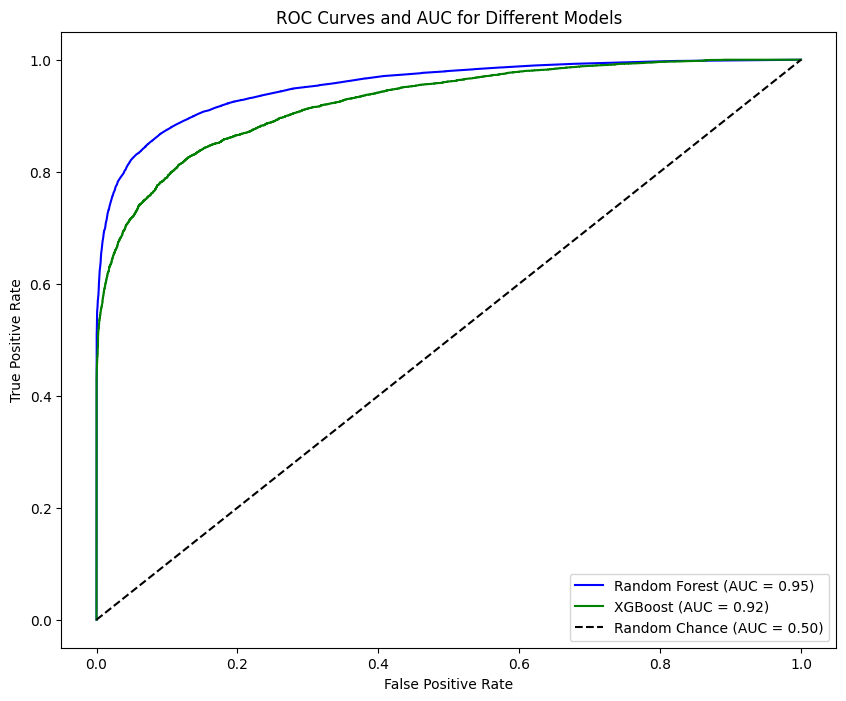

In [ ]:
plt.figure(figsize=(10, 8))
models_list = [ rd_clf,xgb]
model_names = ['Random Forest', 'XGBoost']
colors = ['blue', 'green', 'red', 'purple', 'brown']
for model, name, color in zip(models_list, model_names, colors):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves and AUC for Different Models')
plt.legend(loc='lower right')
plt.show()

- 두 모델의 accuracy를 비교했을 때, 랜덤포레스트가 0.90으로 가장 높았음
- 두 모델의 f1-score를 비교했을 때, 랜덤포레스트가 0.89로 가장 높았음
- 두 모델의 ROC-AUC를 비교했을 때, 랜덤포레스트가 0.95로 가장 높았음
- 따라서 전반적인 성능이 가장 높은 랜덤포레스트를 최종 모델로 선택

---
# `6` 교차 검증
- 최종 선택된 모델에 대해 : 랜덤포레스트
1. RandomizedSearchCV을 이용, 최적의 하이퍼파라미터(n_estimators, criterion) 조합 탐색
2. 분산-편향 그래프와 total error 그래프 확인

In [ ]:
import time

In [ ]:
# RandomForestClassifier 초기화
rd_clf = RandomForestClassifier()

# RandomizedSearchCV를 위한 하이퍼파라미터 범위 설정
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500], # 분류기 개수
    'criterion' : ['gini', 'entropy']  # 불순도
}

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(rd_clf, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)

# 최적의 하이퍼파라미터로 모델 학습 - 시간 측정 시작
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# 학습에 걸린 시간 계산
elapsed_time = end_time - start_time

# 최적의 모델
best_rf = random_search.best_estimator_

# 최적의 모델로 테스트 데이터 예측
y_pred_best = best_rf.predict(X_test)

# 정확도 계산
acc_best = accuracy_score(y_test, y_pred_best)

# 결과 출력
# 최적의 하이퍼파라미터 출력
print("Best hyperparameters:", random_search.best_params_)
print(f"Accuracy Score of Best Random Forest is : {acc_best}")
print(f"Elapsed Time for RandomizedSearchCV: {elapsed_time:.2f} seconds")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'n_estimators': 400, 'criterion': 'gini'}
Accuracy Score of Best Random Forest is : 0.9025272276186872
Elapsed Time for RandomizedSearchCV: 2065.51 seconds


Best hyperparameters: {'n_estimators': 400, 'criterion': 'entropy'}
Accuracy Score of Best Random Forest is : 0.9031159328875994

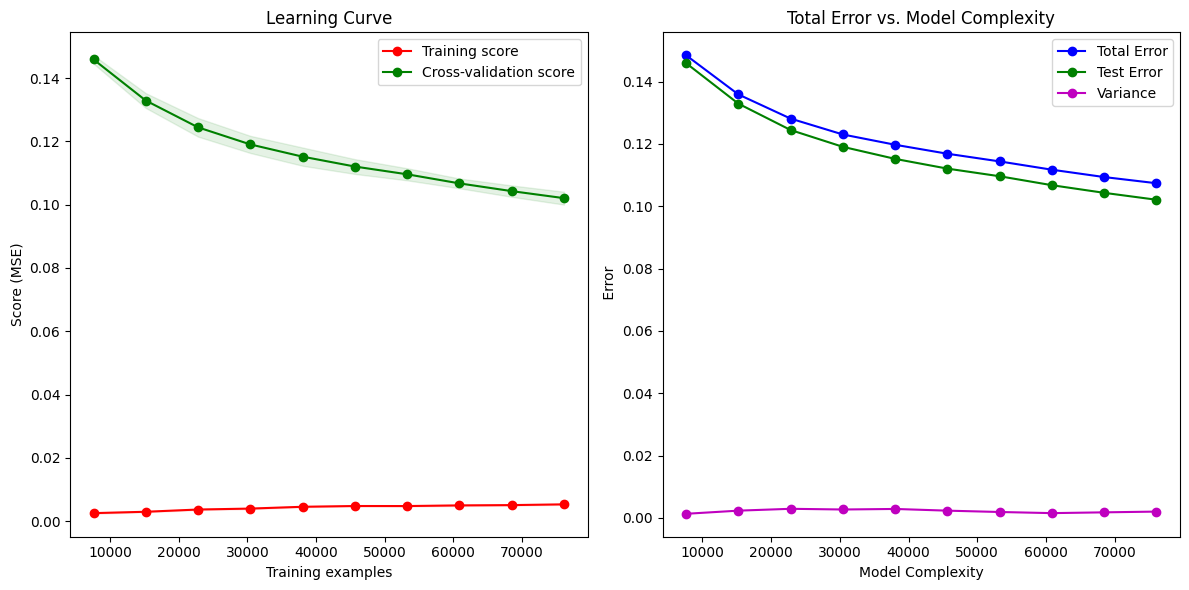

Elapsed Time for RandomizedSearchCV: 2065.51 seconds


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=None):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring="neg_mean_squared_error")

    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score (MSE)")
    plt.legend(loc="best")

    plt.subplot(1, 2, 2)
    total_error = test_scores_mean + train_scores_mean
    plt.plot(train_sizes, total_error, 'o-', color="b", label="Total Error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test Error")
    plt.plot(train_sizes, test_scores_std, 'o-', color="m", label="Variance")
    plt.title("Total Error vs. Model Complexity")
    plt.xlabel("Model Complexity")
    plt.ylabel(" Error")
    plt.legend(loc="best")

    plt.tight_layout()
    plt.show()

# 예제 실행: best_rf 모델과 데이터 X_train, y_train 사용
start_time = time.time()
plot_learning_curve(best_rf, X_train, y_train, cv=5)
end_time = time.time()
print(f"Elapsed Time for RandomizedSearchCV: {elapsed_time:.2f} seconds")

- 이 결과들은 모델이 데이터를 더 많이 받을수록, 즉 훈련 데이터의 양이 증가할수록 성능이 향상되고 오류가 감소하는 경향을 보여줌.
- 교차 검증 점수의 감소와 훈련 점수의 일정한 유지는 모델이 일반화를 잘하고 있음을 나타내며, 이는 과적합이 발생하지 않고 적절한 복잡성을 가진 모델을 사용하고 있음을 의미함.
- 따라서 현재의 모델 설정과 데이터 처리 방식이 적절하며, 더 많은 데이터를 제공받는다면 모델의 예측 능력이 더욱 향상될 가능성이 높음

학습데이터가 매우 커졌음에도 불구하고 Learning curve에서 기울기가 변하는 지점이 발생하지 않는 이유
- 모델 복잡성의 한계 : 모델이 현재 사용가능한 데이터 양으로 충분히 복잡해져 추가의 데이터가 모델 성능 향상에 딱히 도움이 되지 않음 → 모델 복잡성 증가 시키거나 다른 유형 모델 시도
- 과적합 성능 개선X : 랜덤포레스트의 경우에 모든 트리에 대해 과적합 시켜 평균을 내는 방법이기 때문에 위와같은 양상을 보일 수 있음.

---
# `7` 고객 유형 시각화
- Feature Importance
- Partial Dependence Plots (PDP)
- SHAP (SHapley Additive exPlanations)

## `7-01` Feature Importance
- 앞서 RandomizedSearchCV를 통해 구한 최적모델(best_rf)의 특성 중요도를 확인
- 상위 10개의 중요 변수 확인

년도와 월의 가중치를 파이 차트로 시각화

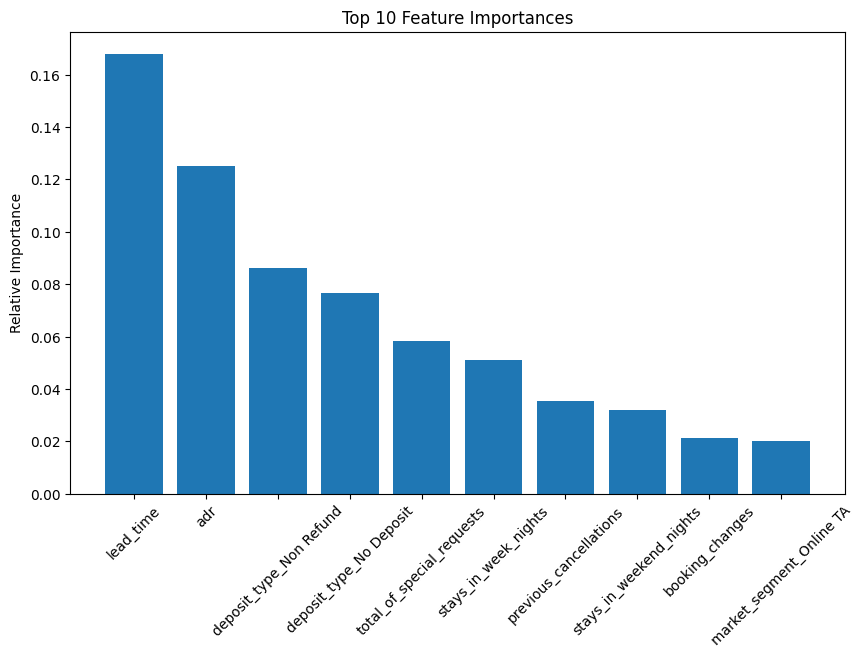

In [ ]:
# 특성 중요도 시각화

best_importances = best_rf.feature_importances_
indices = np.argsort(best_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.bar(range(10), best_importances[indices[:10]], align='center')
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=45)
plt.ylabel('Relative Importance')
plt.show()

- lead_time: 예약 시점과 도착 시점 사이의 일수
- adr: 평균 일일 요금
- deposit_type_Non_Refund: 보증금 유형 중 "환불 불가"
- deposit_type_No_Deposit: 보증금 유형 중 "보증금 없음"
- total_of_special_requests: 총 특별 요청 수
- stays_in_week_nights: 주중 밤 숙박 수
- previous_cancellations: 이전 취소 건수
- stays_in_weekend_nights : 주말 밤 숙박 수
- booking_changes : 예약 변경 횟수
- market_segment_Online TA : 시장 세분화 유형 중 "온라인 여행사"

중요도가 높은 각 변수에 대한 해석

## `7-02` Partial Dependence Plots (PDP)
- 7-01 Feature Importance 결과 참고하여 중요도가 높은 순서로 수치형 변수에 대해서만 확인
- PDP : 모델에서 특정 특징(변수)들이 예측 결과에 어떤 영향을 미치는지 시각적으로 파악

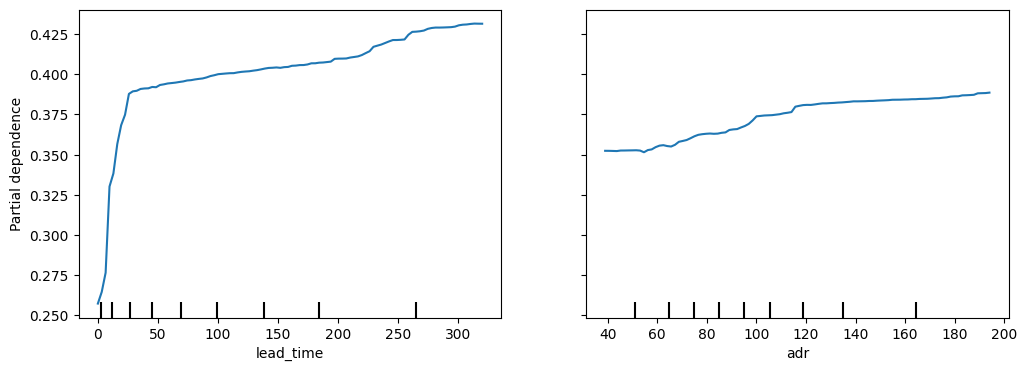

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# 모델 설정 및 훈련 (simple tree 형태)
simple_tree = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, n_jobs=-1)
simple_tree.fit(X_train, y_train)

# Partial Dependence Plot 생성
features = ['lead_time', 'adr']
fig, ax = plt.subplots(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(simple_tree, X_train, features=features, ax=ax)
plt.show()

- lead_time: 예약과 실제 이용 날짜 사이의 시간이 길수록 예측된 취소 확률이 증가하는 경향을 보임
  - 사람들이 계획을 변경할 가능성이 더 높아지기 때문에
- adr : 하루 숙박 비용이 높을수록 예측된 취소 확률이 점차 증가하는 경향을 보임
  - 고가의 예약이 경제적 부담이 될 수 있으며, 소비자가 더 나은 가격이나 조건을 찾아 예약을 변경하거나 취소할 가능성이 있음

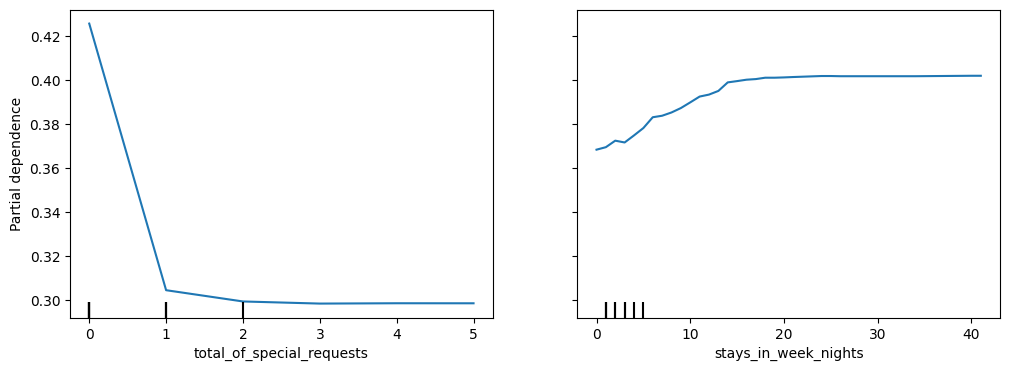

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# 모델 설정 및 훈련  (simple tree 형태)
simple_tree = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, n_jobs=-1)
simple_tree.fit(X_train, y_train)

# Partial Dependence Plot 생성
features = ['total_of_special_requests', 'stays_in_week_nights']
fig, ax = plt.subplots(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(simple_tree, X_train, features=features, ax=ax)
plt.show()

- total_of_special_requests : 고객이 특별 요청을 많이 할수록 취소할 가능성이 낮아진다는 것을 의미
  - 이는 고객이 특정 서비스나 요구 사항에 대해 더 관심을 가지고 있어 그 예약을 유지할 가능성이 높음을 시사
  - 호텔이나 서비스 제공자는 이 정보를 사용하여 고객의 특별 요청을 적극적으로 수용함으로써 예약 취소율을 감소시킬 수 있음
- stays_in_week_nights : 더 긴 주중 숙박이 예약 취소와 관련이 있을 수 있음
  - 이는 긴 숙박 기간 동안 발생할 수 있는 불확실성 또는 변경 가능성 때문일 수 있음
  - 호텔이나 숙박업체는 긴 숙박 예약에 대해 유연한 취소 정책을 제공할 수 있음

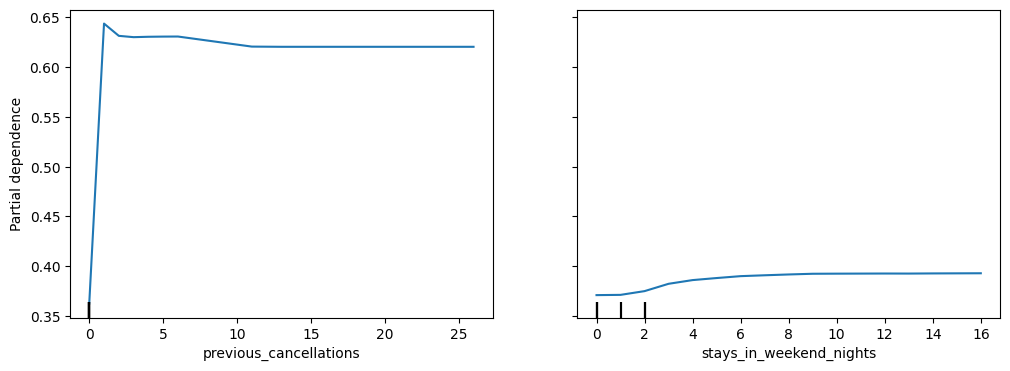

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# 모델 설정 및 훈련  (simple tree 형태)
simple_tree = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, n_jobs=-1)
simple_tree.fit(X_train, y_train)

# Partial Dependence Plot 생성
features = ['previous_cancellations', 'stays_in_weekend_nights']
fig, ax = plt.subplots(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(simple_tree, X_train, features=features, ax=ax)
plt.show()

- previous_cancellations : 고객이 이전에 취소 이력이 있을 경우 다시 취소할 확률이 높음. 그러나 초기 몇 회의 취소 후에는 추가 취소가 예측 확률에 미치는 영향이 크게 감소함
  - 호텔이나 예약 서비스 제공자가 이전 취소 이력이 있는 고객을 관리하는 전략을 개발할 필요가 있음
- stays_in_weekend_nights : 더 긴 주말 숙박이 예약 취소와 관련이 있을 수 있음
이는 긴 숙박 기간 동안 발생할 수 있는 불확실성 또는 변경 가능성 때문일 수 있음
호텔이나 숙박업체는 긴 숙박 예약에 대해 유연한 취소 정책을 제공할 수 있음

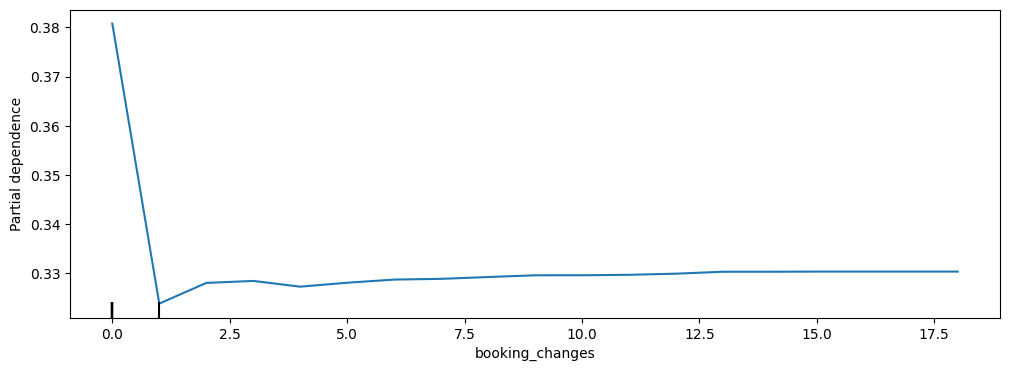

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# 모델 설정 및 훈련  (simple tree 형태)
simple_tree = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, n_jobs=-1)
simple_tree.fit(X_train, y_train)

# Partial Dependence Plot 생성
features = ['booking_changes']
fig, ax = plt.subplots(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(simple_tree, X_train, features=features, ax=ax)
plt.show()

- booking_changes
  - 예약 변경 횟수 0회: 예약 변경이 없는 경우, 예약 취소 확률이 상대적으로 높습니다. 이는 예약 초기에 불확실성이나 만족도가 낮을 경우 고객이 취소할 가능성이 높음을 의미할 수 있습니다.
  - 예약 변경 횟수 1회 이상: 예약을 한 번 이상 변경할 경우, 예약 취소 확률이 급격히 감소합니다. 이는 고객이 예약 변경을 통해 자신의 요구사항을 더 잘 충족시키게 되어 취소할 필요가 적어지기 때문일 수 있습니다. 예약 변경 횟수가 증가하면서도 취소 확률은 안정적으로 낮은 수준을 유지합니다.